In [1]:
from scripts.preprocessing import PreProcessor
import scripts.visualizer as visualizer
import pandas as pd
from ast import literal_eval
import importlib

DATA_FILE = 'data/congress-tweets.csv'
PREPROCESSED_FILE = 'data/processed-tweets.csv'

### Pre-process Tweets (Once)

In [2]:
# Don't run if you already have data/processed-tweets.csv
tweets = pd.read_csv(DATA_FILE, encoding='utf-8')
pp = PreProcessor()
processed_tweets = pp.pre_process_df(tweets)
# Saving locally so we only have to pre-process once
processed_tweets.to_csv(PREPROCESSED_FILE, encoding='utf-8', index=False)
# Save as h5 if we want to preserve types
# processed_tweets.to_hdf('processed-tweets.h5', key='processed')

[nltk_data] Downloading package stopwords to /Users/shaan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Removing users from Tweets
Removing hashtags from Tweets
Removing links from Tweets
Removing punctuation, numbers, and special characters from Tweets
Extracting Tweet dates
Tokenizing Tweets


100%|█████████████████████████████████████████████████████████████████████████████| 809362/809362 [00:34<00:00, 23451.07it/s]


Removing stop words from Tweets


100%|█████████████████████████████████████████████████████████████████████████████| 809362/809362 [00:26<00:00, 30765.57it/s]


Dropping empty Tweets


100%|████████████████████████████████████████████████████████████████████████████| 809362/809362 [00:00<00:00, 954102.29it/s]


Done processing Tweets!


### Load Processed Tweets

In [ ]:
processed_tweets = pd.read_csv(PREPROCESSED_FILE, 
                               encoding='utf-8', 
                               converters={'tokens_no_stop': literal_eval})
# Working with subset of data for speed
# processed_tweets = processed_tweets.sample(n=50000)

### Visualize data

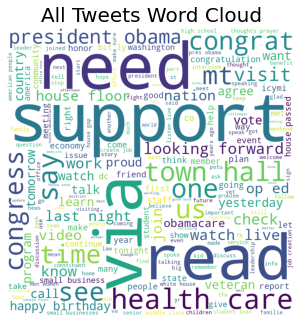

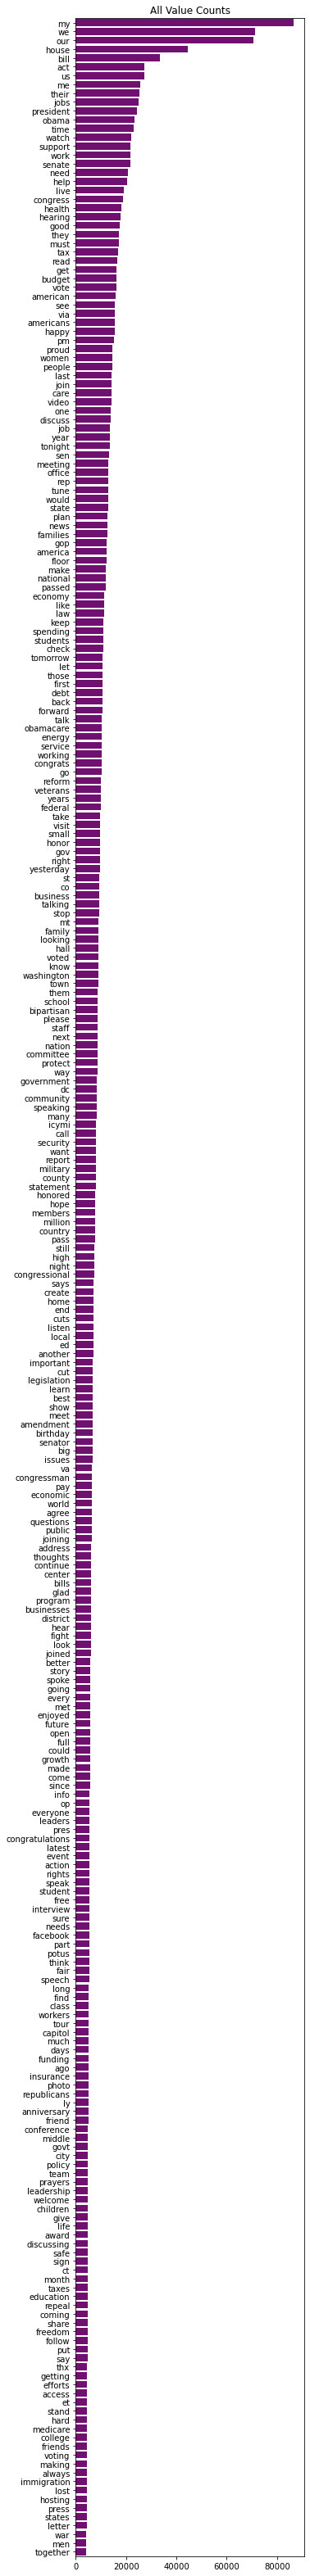

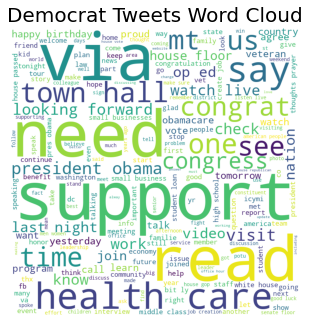

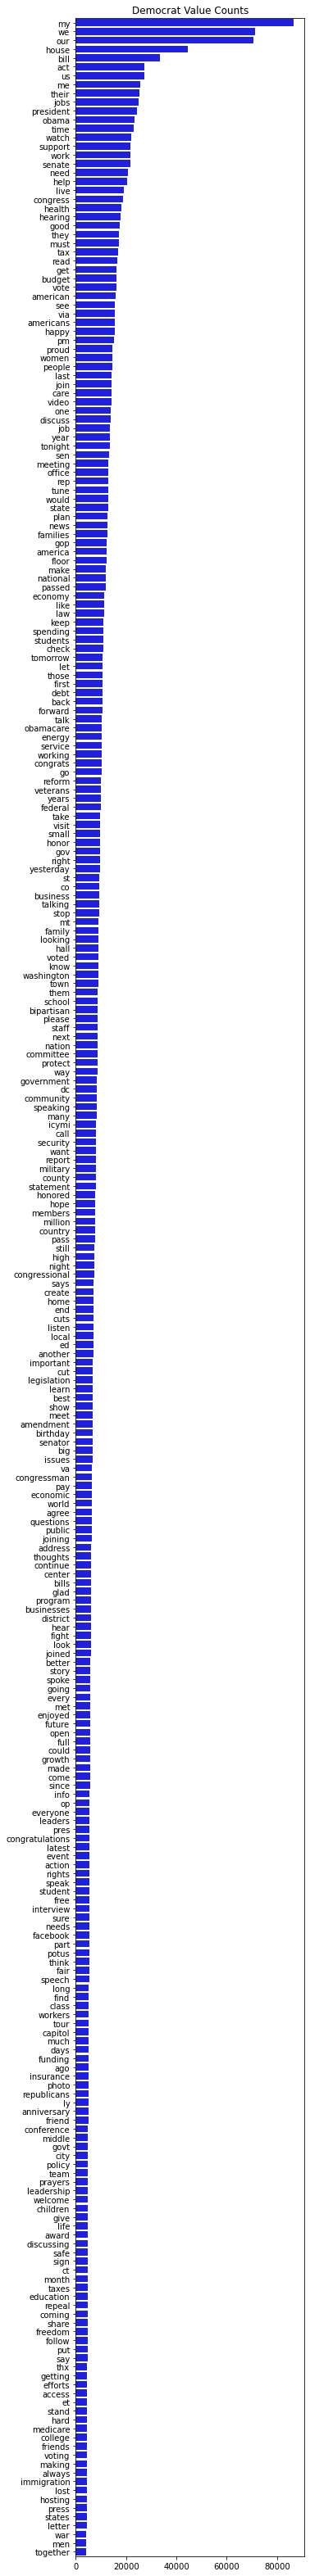

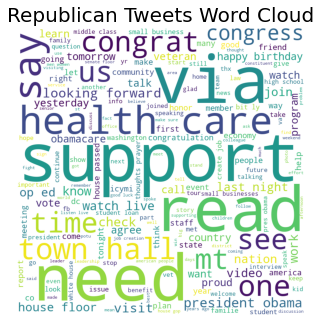

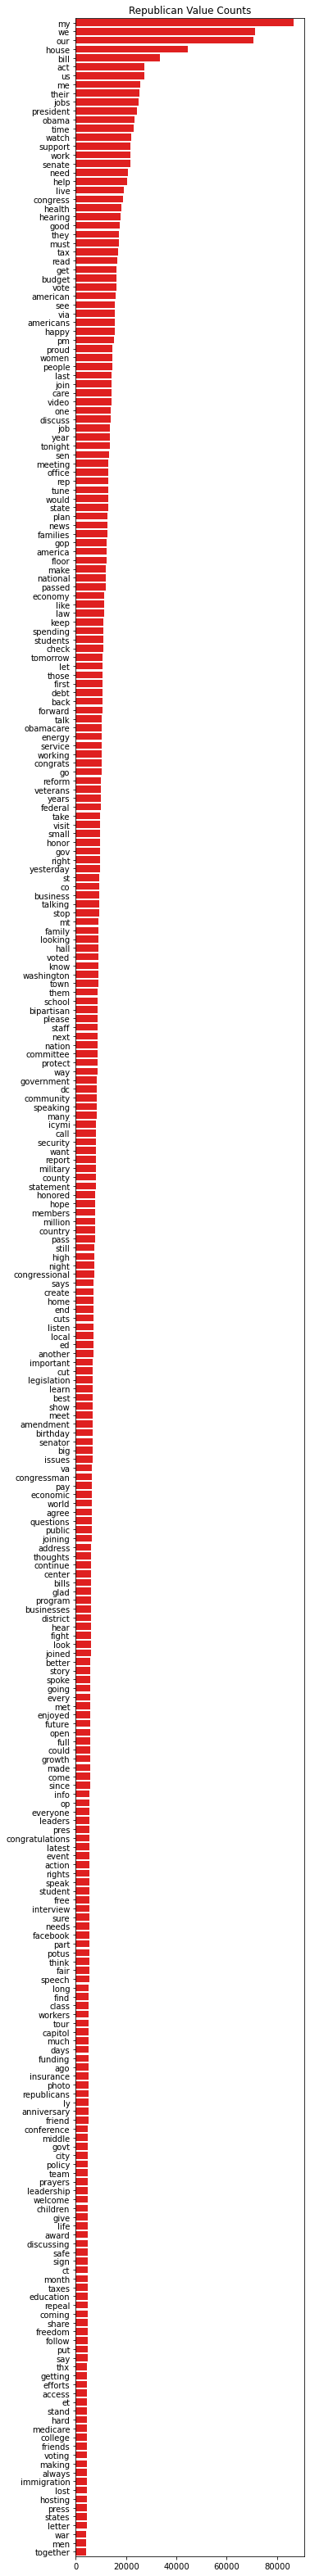

In [6]:
importlib.reload(visualizer)
v = visualizer.Visualizer()
v.visualize_words(processed_tweets)

### Analyzing Sentiment

In [ ]:
neg_words = pd.read_csv('data/negativewords.csv').squeeze('columns')
v.visualize_word_freq(neg_words, processed_tweets, word_type='Negative')

In [ ]:
pos_words = pd.read_csv("data/positivewords.csv").squeeze('columns')
v.visualize_word_freq(pos_words, processed_tweets, word_type='Positive')

### Analyzing Bad Words

In [ ]:
bad_words = pd.read_csv('data/bad-words.csv').squeeze('columns')
v.visualize_word_freq(bad_words, processed_tweets, word_type='Bad')

Filtering tweets that don't contain given words:


100%|██████████████████████████████████████████████████████████████████████████████████████| 917/917 [03:46<00:00,  4.06it/s]


Percentage of tweets with Bad words:
party
D    0.009141
R    0.006008
Name: tweet, dtype: float64


100%|██████████████████████████████████████████████████████████████████████████████████████| 917/917 [02:53<00:00,  5.27it/s]


Proportion of Bad words in D tweets: 0.0010532849738571436


 53%|█████████████████████████████████████████████▍                                        | 484/917 [02:34<02:20,  3.09it/s]

### Analyzing Inclusive and Exclusive Language

Filtering tweets that don't contain given words:


100%|██████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.36it/s]


Percentage of tweets with Inclusive words:
party
D    0.186499
R    0.161657
Name: tweet, dtype: float64


100%|██████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  5.18it/s]


Proportion of Inclusive words in D tweets: 0.025387254957807963


100%|██████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.17it/s]


Proportion of Inclusive words in R tweets: 0.022617244000787316
Generating word frequencies:


100%|██████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 11.33it/s]


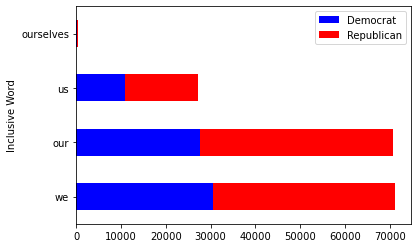

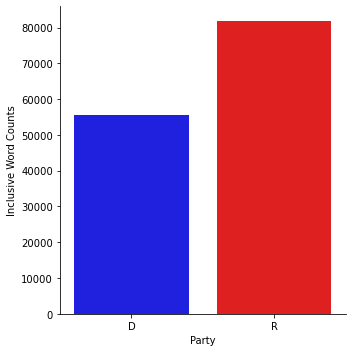

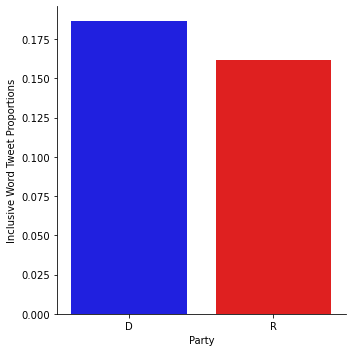

In [7]:
inclusive_words = pd.Series(['we', 'our', 'us', 'ours', 'ourselves'])
v.visualize_word_freq(inclusive_words, processed_tweets, word_type='Inclusive')

Filtering tweets that don't contain given words:


100%|██████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.74it/s]


Percentage of tweets with Exclusive words:
party
D    0.178656
R    0.194532
Name: tweet, dtype: float64


100%|██████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.22it/s]


Proportion of Exclusive words in D tweets: 0.02261291850712842


100%|██████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.08it/s]


Proportion of Exclusive words in R tweets: 0.02555206841693738
Generating word frequencies:


100%|██████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.55it/s]


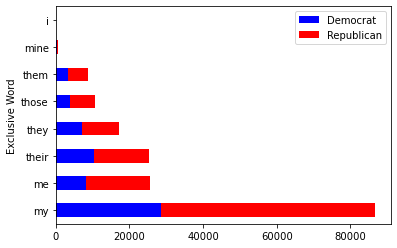

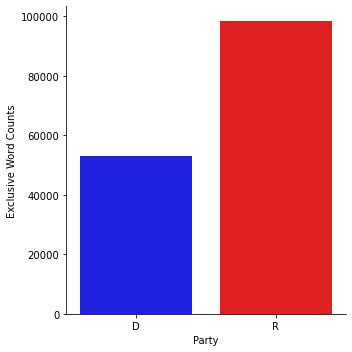

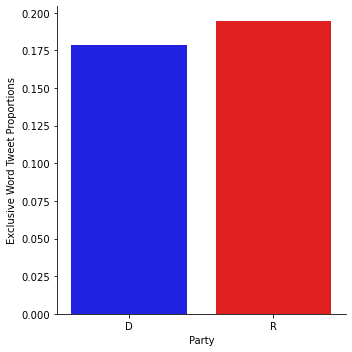

In [8]:
exclusive_words = pd.Series(['my', 'i', 'mine', 'me', 'them', 'their', 'they', 'those'])
v.visualize_word_freq(exclusive_words, processed_tweets, word_type='Exclusive')

### Analyzing Religious Language

Filtering tweets that don't contain given words:


100%|████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:18<00:00,  3.97it/s]


Percentage of tweets with Religious words:
party
D    0.011364
R    0.018498
Name: tweet, dtype: float64


100%|████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:15<00:00,  4.94it/s]


Proportion of Religious words in D tweets: 0.0013822068341509829


100%|████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:24<00:00,  3.08it/s]


Proportion of Religious words in R tweets: 0.002384065181001154
Generating word frequencies:


100%|████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:00<00:00, 99.74it/s]


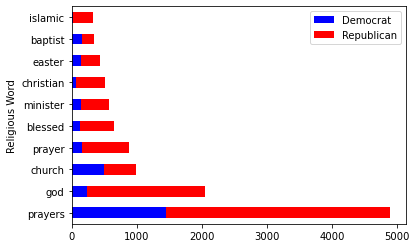

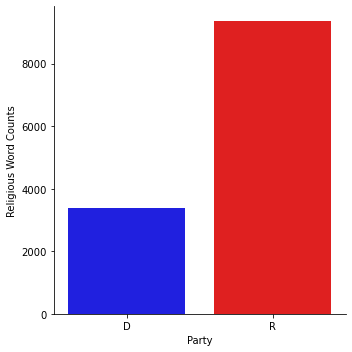

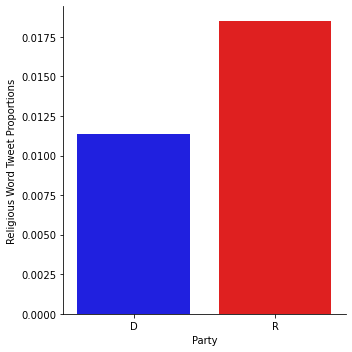

In [9]:
religious_words = pd.read_csv('data/religious_words.csv').squeeze('columns')
v.visualize_word_freq(religious_words, processed_tweets, word_type="Religious")